![Alt text](https://imgur.com/orZWHly.png=80)
source: @allison_horst https://github.com/allisonhorst/penguins

You have been asked to support a team of researchers who have been collecting data about penguins in Antartica! The data is available in csv-Format as `penguins.csv`

**Origin of this data** : Data were collected and made available by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER, a member of the Long Term Ecological Research Network.

**The dataset consists of 5 columns.**

Column | Description
--- | ---
culmen_length_mm | culmen length (mm)
culmen_depth_mm | culmen depth (mm)
flipper_length_mm | flipper length (mm)
body_mass_g | body mass (g)
sex | penguin sex

Unfortunately, they have not been able to record the species of penguin, but they know that there are **at least three** species that are native to the region: **Adelie**, **Chinstrap**, and **Gentoo**.  Your task is to apply your data science skills to help them identify groups in the dataset!

In [11]:
# Import Required Packages
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Loading and examining the dataset
penguins_df = pd.read_csv("penguins.csv")
penguins_df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,36.7,19.3,193.0,3450.0,FEMALE
4,39.3,20.6,190.0,3650.0,MALE


In [12]:
penguins_df.shape

(332, 5)

In [13]:
y= pd.get_dummies(penguins_df, columns=['sex'], dummy_na=True)

In [14]:
X = penguins_df.drop('sex',axis=1).values
X

array([[  39.1,   18.7,  181. , 3750. ],
       [  39.5,   17.4,  186. , 3800. ],
       [  40.3,   18. ,  195. , 3250. ],
       ...,
       [  50.4,   15.7,  222. , 5750. ],
       [  45.2,   14.8,  212. , 5200. ],
       [  49.9,   16.1,  213. , 5400. ]])

In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [16]:
from sklearn.cluster import KMeans

# Assuming X is your data
inertia = []

# Try different values of n_clusters
for i in range(1, 11):
    model = KMeans(n_clusters=i, random_state=42)
    model.fit(X_scaled)  # Only need X for fitting
    inertia.append(model.inertia_)  # Store the inertia value

# Find the optimal number of clusters (best 'elbow' point)
best_n_clusters = inertia.index(min(inertia[1:])) + 2  # Get the index of minimum inertia after 1 cluster

print(f"The best number of clusters: {best_n_clusters}")


The best number of clusters: 11


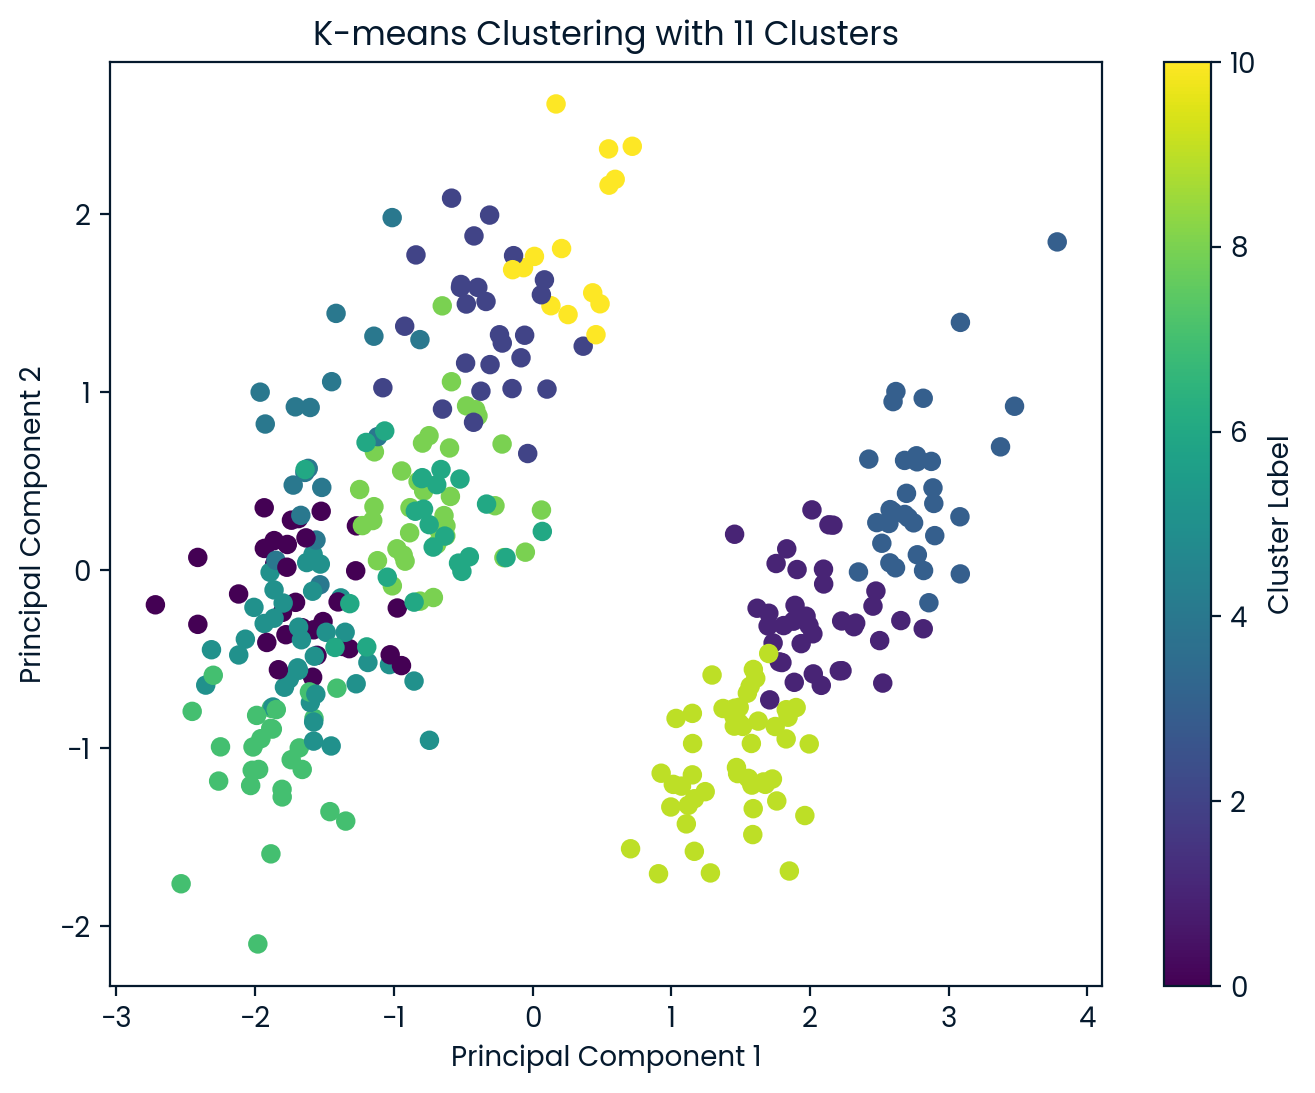

In [18]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Assuming X_scaled is your preprocessed data
# and you have already determined that the optimal number of clusters is 11

# Step 1: Apply K-means with 11 clusters
model = KMeans(n_clusters=11, random_state=42)
model.fit(X_scaled)

# Step 2: Get the cluster labels for each data point
labels = model.labels_

# Step 3: Optional - reduce the dimensions of X_scaled to 2D for easy visualization (using PCA)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Step 4: Create a scatter plot where each point is colored by its cluster label
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', marker='o')
plt.title(f"K-means Clustering with 11 Clusters")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(label='Cluster Label')
plt.show()


In [19]:
numeric_columns = penguins_df.drop('sex', axis=1)
numeric_columns.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
0,39.1,18.7,181.0,3750.0
1,39.5,17.4,186.0,3800.0
2,40.3,18.0,195.0,3250.0
3,36.7,19.3,193.0,3450.0
4,39.3,20.6,190.0,3650.0


In [20]:
numeric_columns['label'] = model.labels_
numeric_columns.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,label
0,39.1,18.7,181.0,3750.0,0
1,39.5,17.4,186.0,3800.0,0
2,40.3,18.0,195.0,3250.0,5
3,36.7,19.3,193.0,3450.0,5
4,39.3,20.6,190.0,3650.0,4


In [21]:
stat_penguins = numeric_columns.groupby('label').mean()
stat_penguins


,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
label,,,,
0,39.740625,18.125000,183.562500,3602.343750
1,47.721622,15.248649,217.216216,5206.081081
2,50.744444,18.796296,195.592593,3717.592593
3,50.948485,16.039394,225.212121,5663.636364
4,39.433333,20.383333,193.222222,3977.777778
5,37.120000,18.094286,191.314286,3512.142857
6,45.833333,17.375000,191.458333,3473.958333
7,36.392593,16.814815,186.148148,3150.925926
8,41.658333,18.783333,195.722222,4243.750000
